# Assignment 1 
## Done by
### Hana Waleed       7599
### Rowan Waleed      7702
### Mena Tallah Majdi 7754


# _____ KNN_____
 


In [1]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, accuracy_score

import seaborn as sns
import random
from sklearn.neighbors import KNeighborsClassifier
# from sklearn.preprocessing import LabelEncoder
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

Adding Columns and Reading the data

In [2]:
#adding labels to the columns
column_names = ['Feature1', 'Feature2', 'Feature3','Feature4','Feature5','Feature6','Feature7', 'Feature8', 'Feature9', 'Feature10', 'label']
#reading the data
dataset = pd.read_csv("magic04.data", delimiter=',', names=column_names)
dataset

Feature1  Feature2  Feature3  Feature4  Feature5  Feature6  Feature7  \
0       28.7967   16.0021    2.6449    0.3918    0.1982   27.7004   22.0110   
1       31.6036   11.7235    2.5185    0.5303    0.3773   26.2722   23.8238   
2      162.0520  136.0310    4.0612    0.0374    0.0187  116.7410  -64.8580   
3       23.8172    9.5728    2.3385    0.6147    0.3922   27.2107   -6.4633   
4       75.1362   30.9205    3.1611    0.3168    0.1832   -5.5277   28.5525   
...         ...       ...       ...       ...       ...       ...       ...   
19015   21.3846   10.9170    2.6161    0.5857    0.3934   15.2618   11.5245   
19016   28.9452    6.7020    2.2672    0.5351    0.2784   37.0816   13.1853   
19017   75.4455   47.5305    3.4483    0.1417    0.0549   -9.3561   41.0562   
19018  120.5135   76.9018    3.9939    0.0944    0.0683    5.8043  -93.5224   
19019  187.1814   53.0014    3.2093    0.2876    0.1539 -167.3125 -168.4558   

       Feature8  Feature9  Feature10 label  
0       -8.2027   40.0920    81.8828     g  
1       -9.9574    6.3609   205.2610     g  
2      -45.2160   76.9600   256.7880     g  
3       -7.1513   10.4490   116.7370     g  
4       21.8393    4.6480   356.4620     g  
...         ...       ...        ...   ...  
19015    2.8766    2.4229   106.8258     h  
19016   -2.9632   86.7975   247.4560     h  
19017   -9.4662   30.2987   256.5166     h  
19018  -63.8389   84.6874   408.3166     h  
19019   31.4755   52.7310   272.3174     h  

[19020 rows x 11 columns]

In [3]:
#counting the number of samples in each class 
class_counts = dataset['label'].value_counts()
class_counts

label
g    12332
h     6688
Name: count, dtype: int64

In [4]:
#separating the data of the two classes
maxy = class_counts.idxmax()
miny = class_counts.idxmin()
major = dataset[dataset['label'] == maxy ]
minor = dataset[dataset['label'] == miny]

In [5]:
major

Feature1  Feature2  Feature3  Feature4  Feature5  Feature6  Feature7  \
0       28.7967   16.0021    2.6449    0.3918    0.1982   27.7004   22.0110   
1       31.6036   11.7235    2.5185    0.5303    0.3773   26.2722   23.8238   
2      162.0520  136.0310    4.0612    0.0374    0.0187  116.7410  -64.8580   
3       23.8172    9.5728    2.3385    0.6147    0.3922   27.2107   -6.4633   
4       75.1362   30.9205    3.1611    0.3168    0.1832   -5.5277   28.5525   
...         ...       ...       ...       ...       ...       ...       ...   
12327   12.8703   11.4444    2.3811    0.7360    0.3805  -15.0946    5.3032   
12328   26.8595   20.5946    2.8754    0.3438    0.2152   -3.4556  -20.0014   
12329   22.0913   10.8949    2.2945    0.5381    0.2919   15.2776   18.2296   
12330   56.2216   18.7019    2.9297    0.2516    0.1393   96.5758  -41.2969   
12331   31.5125   19.2867    2.9578    0.2975    0.1515   38.1833   21.6729   

       Feature8  Feature9  Feature10 label  
0       -8.2027   40.0920    81.8828     g  
1       -9.9574    6.3609   205.2610     g  
2      -45.2160   76.9600   256.7880     g  
3       -7.1513   10.4490   116.7370     g  
4       21.8393    4.6480   356.4620     g  
...         ...       ...        ...   ...  
12327   11.6208   21.0120   204.0370     g  
12328   -9.0535    3.9848   205.4980     g  
12329    7.3975   21.0680   123.2810     g  
12330   11.3764    5.9110   197.2090     g  
12331  -12.0726   17.5809   171.2270     g  

[12332 rows x 11 columns]

In [6]:
minor

Feature1  Feature2  Feature3  Feature4  Feature5  Feature6  Feature7  \
12332   93.7035   37.9432    3.1454    0.1680    0.1011   53.2566   89.0566   
12333  102.0005   22.0017    3.3161    0.1064    0.0724  -54.0862   43.0553   
12334  100.2775   21.8784    3.1100    0.3120    0.1446  -48.1834   57.6547   
12335   91.6558   18.8293    2.7097    0.4386    0.3420  -52.6841  -97.8373   
12336   38.0195   12.6736    2.8747    0.4084    0.1928  -51.4840    8.3471   
...         ...       ...       ...       ...       ...       ...       ...   
19015   21.3846   10.9170    2.6161    0.5857    0.3934   15.2618   11.5245   
19016   28.9452    6.7020    2.2672    0.5351    0.2784   37.0816   13.1853   
19017   75.4455   47.5305    3.4483    0.1417    0.0549   -9.3561   41.0562   
19018  120.5135   76.9018    3.9939    0.0944    0.0683    5.8043  -93.5224   
19019  187.1814   53.0014    3.2093    0.2876    0.1539 -167.3125 -168.4558   

       Feature8  Feature9  Feature10 label  
12332   11.8175   14.1224   231.9028     h  
12333  -15.0647   88.4636   274.9392     h  
12334   -9.6341   20.7848   346.4330     h  
12335  -17.0955   63.8834   130.7998     h  
12336    7.9620   24.5402   163.8674     h  
...         ...       ...        ...   ...  
19015    2.8766    2.4229   106.8258     h  
19016   -2.9632   86.7975   247.4560     h  
19017   -9.4662   30.2987   256.5166     h  
19018  -63.8389   84.6874   408.3166     h  
19019   31.4755   52.7310   272.3174     h  

[6688 rows x 11 columns]

Randomly Removing data to make the two classes equal

In [7]:

# Calculate the size of the minority class
minority_class_size = minor.shape[0]

# Randomly sample the majority class to match the size of the minority class
balanced_major = major.sample(n = minority_class_size, random_state=42)

# Concatenate the balanced subsets of both classes
balanced_dataset = pd.concat([minor, balanced_major])

# Shuffle the dataset to randomize the order
balanced_dataset = balanced_dataset.sample(frac=1, random_state=42)

class_counts = balanced_dataset['label'].value_counts()
class_counts


label
g    6688
h    6688
Name: count, dtype: int64

Visualizing features against each other and mormalizing data

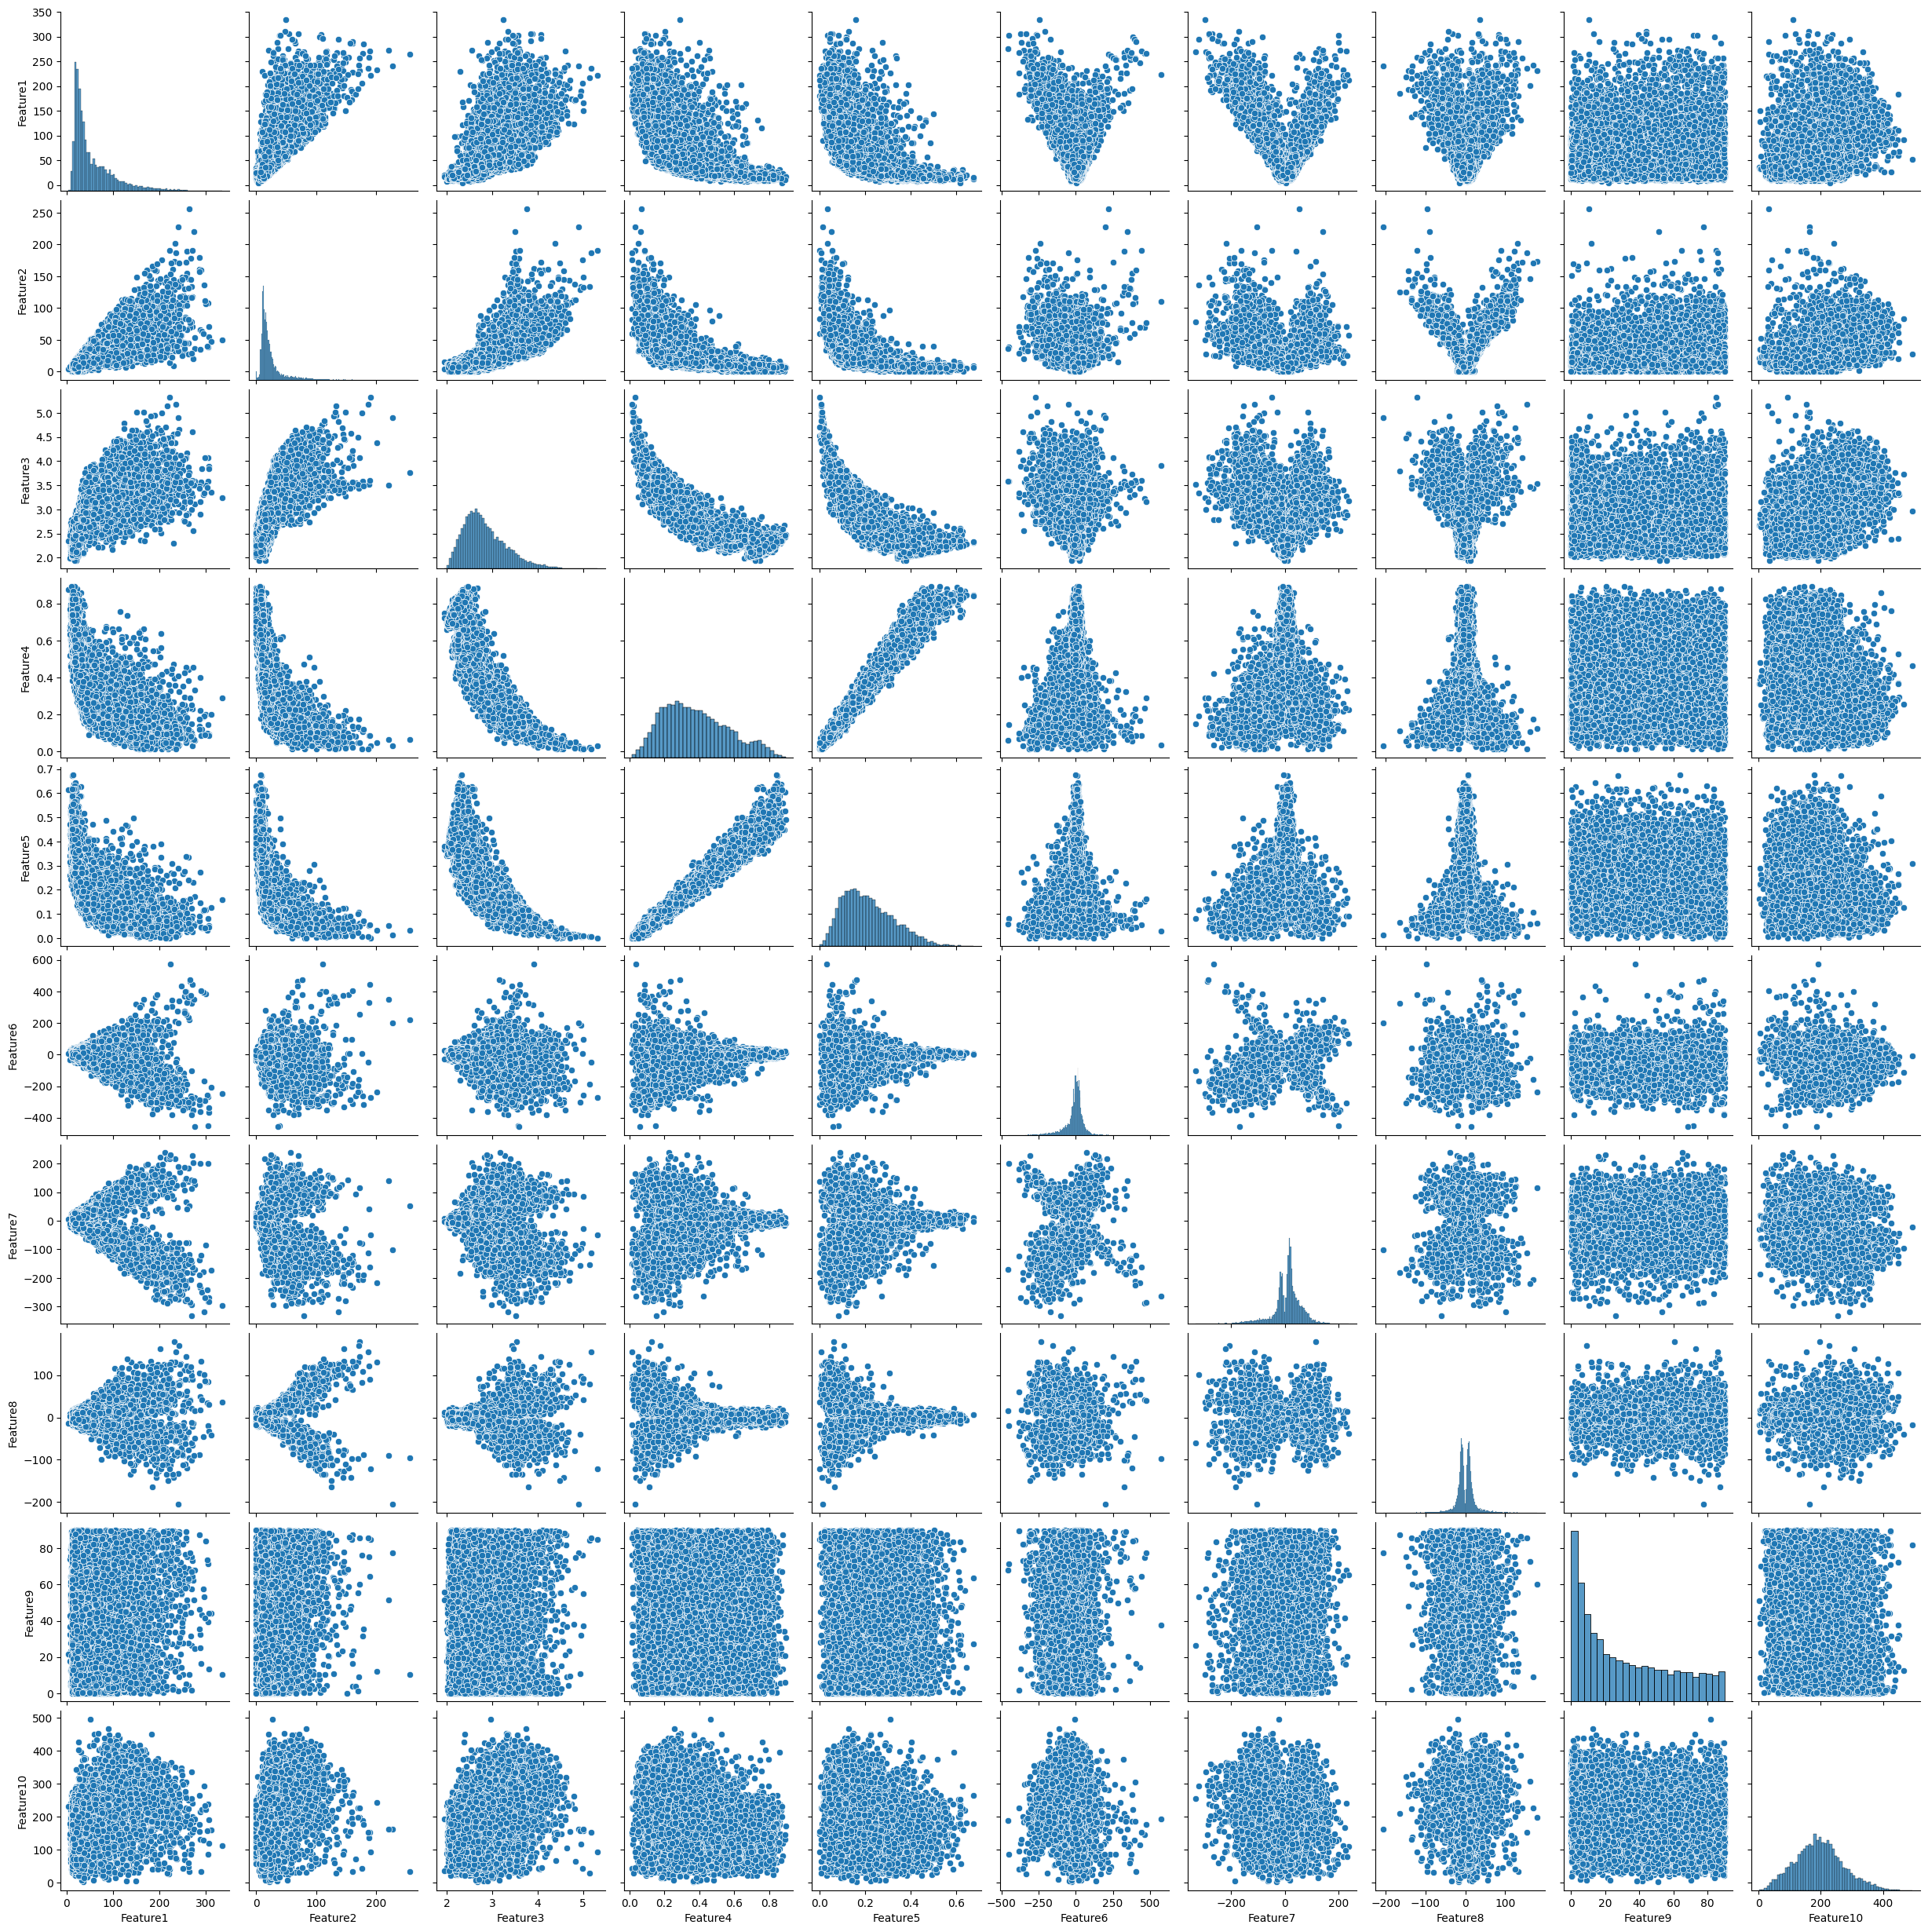

In [8]:
df = balanced_dataset.copy()
sns.pairplot(data=df)

In [9]:
y = balanced_dataset['label']
X = balanced_dataset.drop(columns=['label'])
scaler = StandardScaler()
X = scaler.fit_transform(X)
# Split the data into training and the remaining data
X_train, X_remain, y_train, y_remain = train_test_split(X, y, test_size=0.3, random_state=42)

# Split the remaining data into validation and testing
X_valid, X_test, y_valid, y_test = train_test_split(X_remain, y_remain, test_size=0.5, random_state=42)

In [10]:
balanced_dataset

Feature1  Feature2  Feature3  Feature4  Feature5  Feature6  Feature7  \
11051   19.7239   11.9991    2.2833    0.6563    0.4193   10.2977   20.5510   
13453   78.6022   16.8520    3.0445    0.2735    0.1440   17.9140   69.4950   
7914    17.1244   11.0466    2.2380    0.6069    0.3324    3.0499   -8.1208   
12956  190.5850   52.0182    3.3878    0.1801    0.0956 -113.9130 -136.9320   
6730    21.6754   15.5600    2.4393    0.4473    0.2782   24.0564   16.0578   
...         ...       ...       ...       ...       ...       ...       ...   
3018    19.2398   11.9090    2.4541    0.5659    0.3533    1.9924   -7.1701   
17523   33.3430    8.3643    2.3936    0.4970    0.2687   -0.2477   10.0291   
17722  183.0060   67.1351    3.9101    0.0776    0.0456 -182.9300  111.7160   
13192   35.8637   14.6348    2.7789    0.3794    0.1955   13.5855   20.4734   
4064    26.5592    7.5306    2.2625    0.6339    0.3634  -11.2799    9.7917   

       Feature8  Feature9  Feature10 label  
11051    6.8192   60.3974    95.4172     g  
13453  -19.1926   43.5520   208.5740     h  
7914     6.4100   11.2213   187.2620     g  
12956   45.3605   34.1570   245.8660     h  
6730     0.5722   32.7440    72.7002     g  
...         ...       ...        ...   ...  
3018   -11.0978   47.0555   221.7930     g  
17523   -2.7907   61.4890   210.0610     h  
17722   16.1009   14.6853   184.5620     h  
13192   -9.0084   76.1853   240.4400     h  
4064    -4.7390   16.0440   199.6030     g  

[13376 rows x 11 columns]

In [11]:
X_train

array([[-0.7590996 , -0.53780901, -0.87464869, ...,  0.2637472 ,
        -0.79536565, -1.50404625],
       [ 1.44522536,  0.7717591 ,  0.3698101 , ...,  1.60782412,
         0.70612792,  1.20065397],
       [-0.79845571, -0.64545898, -1.10958704, ..., -0.29303861,
         0.42731323, -0.89040118],
       ...,
       [-0.75421969, -0.80818567, -1.32056925, ...,  0.27406995,
         1.96437373,  0.66276513],
       [ 0.40025672,  0.00523238,  1.0662195 , ...,  0.59641531,
        -1.14460237,  0.9253125 ],
       [ 1.34926441,  2.32053234,  2.83729324, ...,  1.8775817 ,
         1.01307583,  2.06517852]])

In [12]:
X_test

array([[-0.80184719, -0.6805078 , -1.16443401, ...,  0.1516668 ,
         0.55937769, -0.9678336 ],
       [-0.23249234, -0.3700562 , -0.80067883, ...,  0.36567296,
         1.97419144, -2.04798119],
       [-0.78886599, -0.36727029, -0.63634807, ..., -0.35740596,
         1.28295152, -1.30776888],
       ...,
       [-0.32495974, -0.1846593 , -0.63907991, ..., -0.50163125,
        -0.98435278, -1.01087781],
       [-0.91317934, -0.82065045, -1.2375633 , ..., -0.40638187,
        -0.07861378, -0.94343971],
       [ 0.32941614, -0.07998193,  0.87099792, ...,  0.64563259,
        -1.12631652,  0.42437856]])

In [13]:
X_valid

array([[-0.76187232, -0.61587187, -1.24302698, ...,  0.47471903,
         1.44878474, -0.37523266],
       [ 0.51428291, -0.02467544,  1.11833463, ..., -0.18517781,
        -1.1516023 ,  1.05275582],
       [-0.33627816,  0.01350394,  1.4946983 , ...,  0.48726149,
        -0.97724533, -0.12845201],
       ...,
       [ 0.14006921,  0.1214842 ,  1.13073298, ..., -0.70889637,
        -1.1037966 ,  0.09145712],
       [-0.3449897 ,  0.3011178 , -0.056147  , ..., -1.22503342,
         0.42101032, -0.7925794 ],
       [-0.7999739 , -0.54680338, -0.58633436, ...,  0.40157196,
         0.48683492,  0.39522845]])

Choose best k using the validation set 
Trying 100 different Ks
print confusion matrix for each k

In [14]:
#applying KNN to different values if k to choose the best

k_values = np.random.choice(np.arange(3, 500, 2), size=100, replace=False)
k_values.sort()
results = {}  # Create a dictionary to store results

for k in k_values:
    knn_classifier = KNeighborsClassifier(n_neighbors=k)
    knn_classifier.fit(X_train, y_train)
    y_pred = knn_classifier.predict(X_valid)
    accuracy = accuracy_score(y_valid, y_pred)
    results[k] = accuracy
    cm = confusion_matrix(y_valid, y_pred)

    print("Confusion Matrix of", k)
    print(cm)

print(results)

Confusion Matrix of 7
[[877 127]
 [249 753]]
Confusion Matrix of 11
[[895 109]
 [254 748]]
Confusion Matrix of 21
[[896 108]
 [265 737]]
Confusion Matrix of 25
[[895 109]
 [266 736]]
Confusion Matrix of 31
[[884 120]
 [267 735]]
Confusion Matrix of 33
[[887 117]
 [263 739]]
Confusion Matrix of 35
[[888 116]
 [269 733]]
Confusion Matrix of 37
[[888 116]
 [264 738]]
Confusion Matrix of 41
[[889 115]
 [275 727]]
Confusion Matrix of 43
[[891 113]
 [274 728]]
Confusion Matrix of 57
[[879 125]
 [283 719]]
Confusion Matrix of 61
[[883 121]
 [282 720]]
Confusion Matrix of 71
[[886 118]
 [283 719]]
Confusion Matrix of 75
[[883 121]
 [282 720]]
Confusion Matrix of 77
[[883 121]
 [286 716]]
Confusion Matrix of 79
[[883 121]
 [286 716]]
Confusion Matrix of 93
[[879 125]
 [289 713]]
Confusion Matrix of 95
[[880 124]
 [290 712]]
Confusion Matrix of 97
[[881 123]
 [292 710]]
Confusion Matrix of 103
[[879 125]
 [292 710]]
Confusion Matrix of 105
[[879 125]
 [296 706]]
Confusion Matrix of 115
[[879 125

Visualizing the accuracy of different Ks

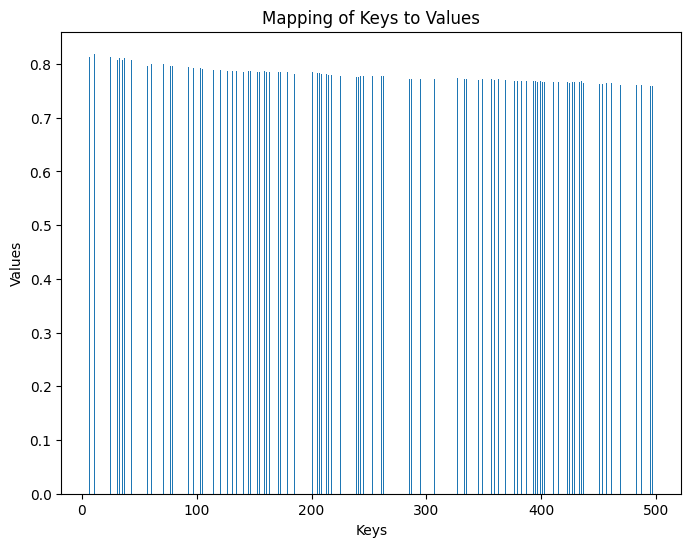

In [15]:
keys = list(results.keys())
values = list(results.values())

# Create a bar chart
plt.figure(figsize=(8, 6))
plt.bar(keys, values)
plt.xlabel('Keys')
plt.ylabel('Values')
plt.title('Mapping of Keys to Values')
plt.show()


In [16]:
best_k = max(results, key=results.get)
print(f"The best k value is: {best_k}")

The best k value is: 11


In [17]:
k = best_k 
knn_classifier = KNeighborsClassifier(n_neighbors=k)
knn_classifier.fit(X_train, y_train)
y_pred = knn_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print("Confusion Matrix:")
print(cm)
print(f"Accuracy: {accuracy}")
print(report)


Confusion Matrix:
[[906 127]
 [259 715]]
Accuracy: 0.807673143996014
              precision    recall  f1-score   support

           g       0.78      0.88      0.82      1033
           h       0.85      0.73      0.79       974

    accuracy                           0.81      2007
   macro avg       0.81      0.81      0.81      2007
weighted avg       0.81      0.81      0.81      2007



# ___Linear Regression ___

In [18]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure
%matplotlib inline
matplotlib.rcParams["figure.figsize"] = (12, 8)
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [19]:
data = pd.read_csv("California_Houses.csv")

In [20]:
data

Median_House_Value  Median_Income  Median_Age  Tot_Rooms  Tot_Bedrooms  \
0                452600.0         8.3252          41        880           129   
1                358500.0         8.3014          21       7099          1106   
2                352100.0         7.2574          52       1467           190   
3                341300.0         5.6431          52       1274           235   
4                342200.0         3.8462          52       1627           280   
...                   ...            ...         ...        ...           ...   
20635             78100.0         1.5603          25       1665           374   
20636             77100.0         2.5568          18        697           150   
20637             92300.0         1.7000          17       2254           485   
20638             84700.0         1.8672          18       1860           409   
20639             89400.0         2.3886          16       2785           616   

       Population  Households  Latitude  Longitude  Distance_to_coast  \
0             322         126     37.88    -122.23        9263.040773   
1            2401        1138     37.86    -122.22       10225.733072   
2             496         177     37.85    -122.24        8259.085109   
3             558         219     37.85    -122.25        7768.086571   
4             565         259     37.85    -122.25        7768.086571   
...           ...         ...       ...        ...                ...   
20635         845         330     39.48    -121.09      162031.481121   
20636         356         114     39.49    -121.21      160445.433537   
20637        1007         433     39.43    -121.22      153754.341182   
20638         741         349     39.43    -121.32      152005.022239   
20639        1387         530     39.37    -121.24      146866.196892   

       Distance_to_LA  Distance_to_SanDiego  Distance_to_SanJose  \
0       556529.158342         735501.806984         67432.517001   
1       554279.850069         733236.884360         65049.908574   
2       554610.717069         733525.682937         64867.289833   
3       555194.266086         734095.290744         65287.138412   
4       555194.266086         734095.290744         65287.138412   
...               ...                   ...                  ...   
20635   654530.186299         830631.543047        248510.058162   
20636   659747.068444         836245.915229        246849.888948   
20637   654042.214020         830699.573163        240172.220489   
20638   657698.007703         834672.461887        238193.865909   
20639   648723.337126         825569.179028        233282.769063   

       Distance_to_SanFrancisco  
0                  21250.213767  
1                  20880.600400  
2                  18811.487450  
3                  18031.047568  
4                  18031.047568  
...                         ...  
20635             222619.890417  
20636             218314.424634  
20637             212097.936232  
20638             207923.199166  
20639             205473.376575  

[20640 rows x 14 columns]

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Median_House_Value        20640 non-null  float64
 1   Median_Income             20640 non-null  float64
 2   Median_Age                20640 non-null  int64  
 3   Tot_Rooms                 20640 non-null  int64  
 4   Tot_Bedrooms              20640 non-null  int64  
 5   Population                20640 non-null  int64  
 6   Households                20640 non-null  int64  
 7   Latitude                  20640 non-null  float64
 8   Longitude                 20640 non-null  float64
 9   Distance_to_coast         20640 non-null  float64
 10  Distance_to_LA            20640 non-null  float64
 11  Distance_to_SanDiego      20640 non-null  float64
 12  Distance_to_SanJose       20640 non-null  float64
 13  Distance_to_SanFrancisco  20640 non-null  float64
dtypes: flo

### Data Cleaning and Visualization

array([[<Axes: title={'center': 'Median_House_Value'}>,
        <Axes: title={'center': 'Median_Income'}>,
        <Axes: title={'center': 'Median_Age'}>,
        <Axes: title={'center': 'Tot_Rooms'}>],
       [<Axes: title={'center': 'Tot_Bedrooms'}>,
        <Axes: title={'center': 'Population'}>,
        <Axes: title={'center': 'Households'}>,
        <Axes: title={'center': 'Latitude'}>],
       [<Axes: title={'center': 'Longitude'}>,
        <Axes: title={'center': 'Distance_to_coast'}>,
        <Axes: title={'center': 'Distance_to_LA'}>,
        <Axes: title={'center': 'Distance_to_SanDiego'}>],
       [<Axes: title={'center': 'Distance_to_SanJose'}>,
        <Axes: title={'center': 'Distance_to_SanFrancisco'}>, <Axes: >,
        <Axes: >]], dtype=object)

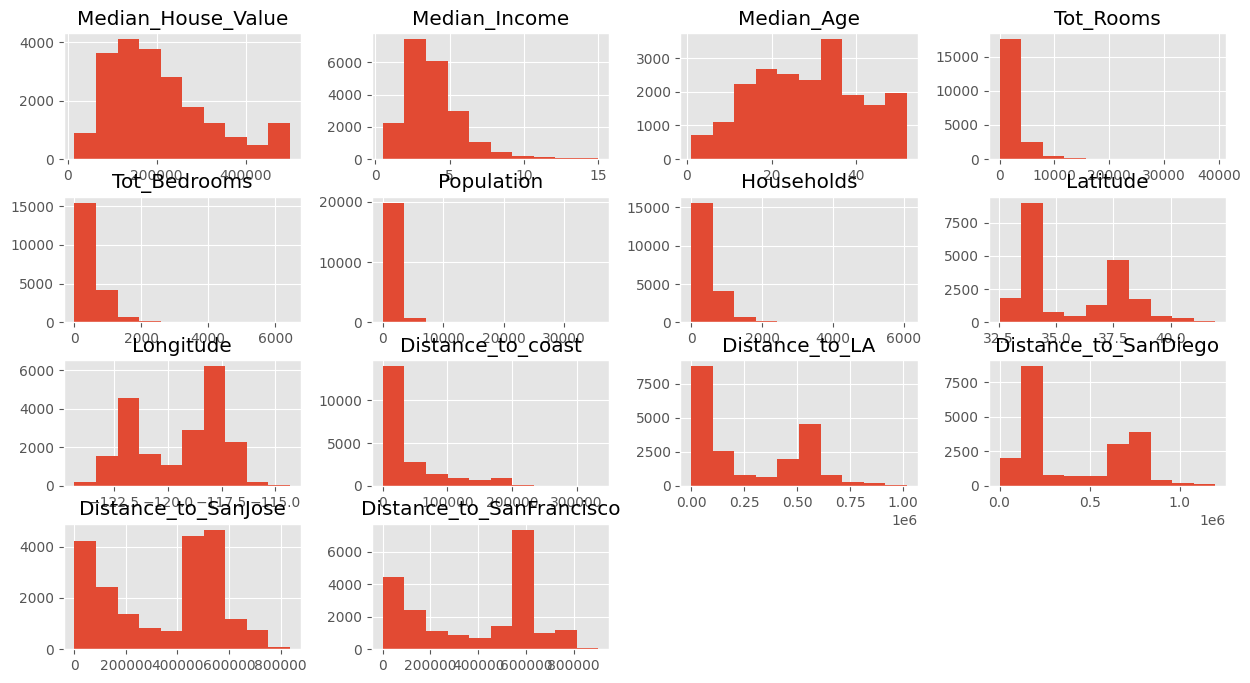

In [22]:
data.hist ( figsize=(15,8) )

In [23]:
data["Rooms_per_household"] = data["Tot_Rooms"]/(data["Households"])
# normalize the right skewed data
data["Tot_Rooms"] = np.log(data["Tot_Rooms"])
data["Tot_Bedrooms"] = np.log(data["Tot_Bedrooms"])
data["Population"] = np.log(data["Population"])
data["Households"] = np.log(data["Households"])

array([[<Axes: title={'center': 'Median_House_Value'}>,
        <Axes: title={'center': 'Median_Income'}>,
        <Axes: title={'center': 'Median_Age'}>,
        <Axes: title={'center': 'Tot_Rooms'}>],
       [<Axes: title={'center': 'Tot_Bedrooms'}>,
        <Axes: title={'center': 'Population'}>,
        <Axes: title={'center': 'Households'}>,
        <Axes: title={'center': 'Latitude'}>],
       [<Axes: title={'center': 'Longitude'}>,
        <Axes: title={'center': 'Distance_to_coast'}>,
        <Axes: title={'center': 'Distance_to_LA'}>,
        <Axes: title={'center': 'Distance_to_SanDiego'}>],
       [<Axes: title={'center': 'Distance_to_SanJose'}>,
        <Axes: title={'center': 'Distance_to_SanFrancisco'}>,
        <Axes: title={'center': 'Rooms_per_household'}>, <Axes: >]],
      dtype=object)

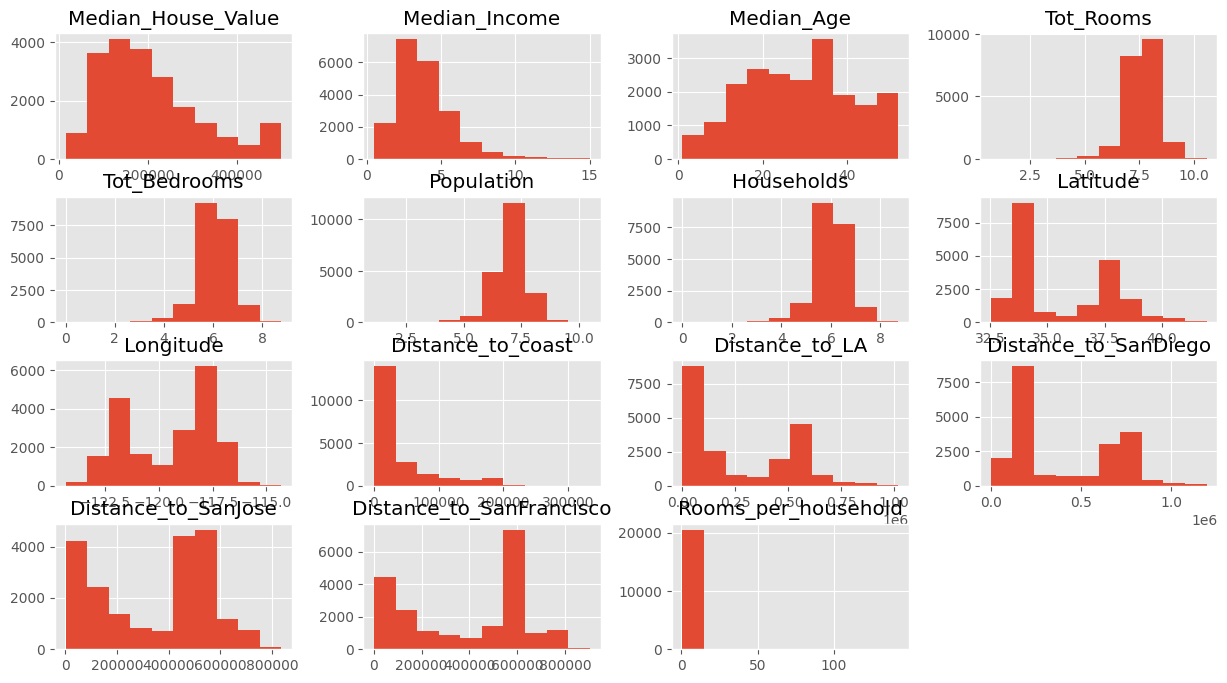

In [24]:
#replot data after normalized
data.hist ( figsize=(15,8) )

<Axes: >

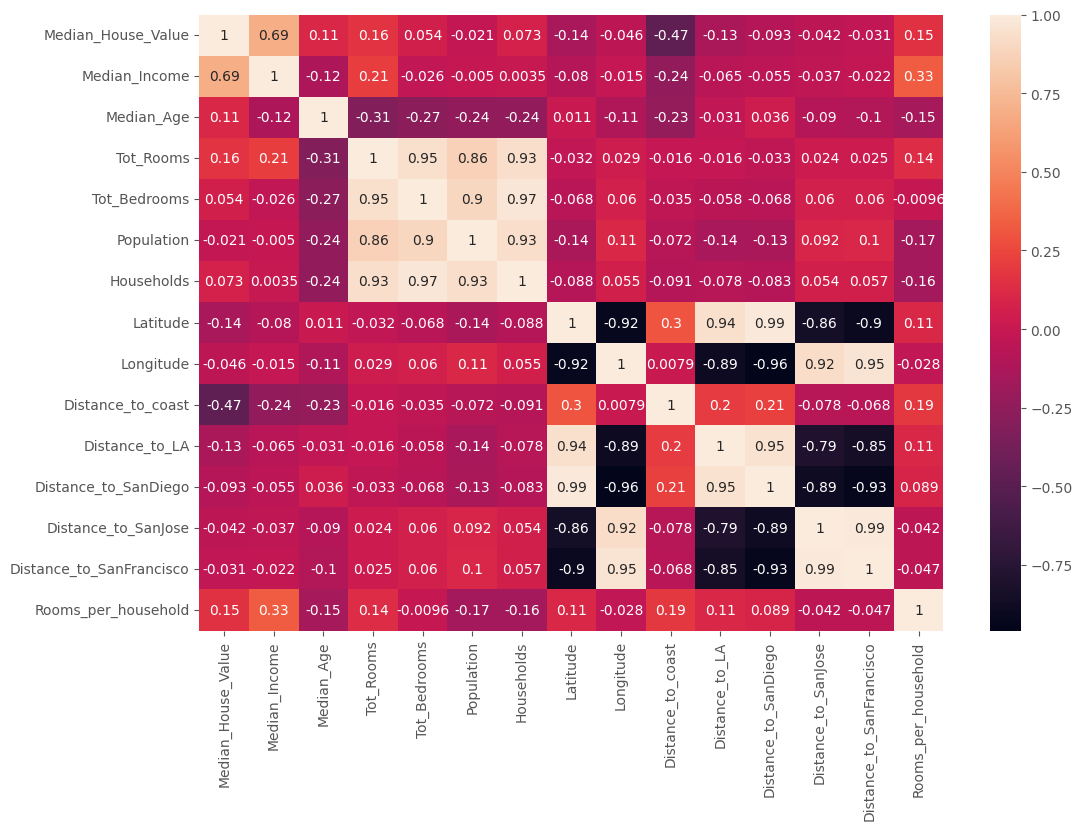

In [25]:
sns.heatmap(data.corr(),annot = True)

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Median_House_Value        20640 non-null  float64
 1   Median_Income             20640 non-null  float64
 2   Median_Age                20640 non-null  int64  
 3   Tot_Rooms                 20640 non-null  float64
 4   Tot_Bedrooms              20640 non-null  float64
 5   Population                20640 non-null  float64
 6   Households                20640 non-null  float64
 7   Latitude                  20640 non-null  float64
 8   Longitude                 20640 non-null  float64
 9   Distance_to_coast         20640 non-null  float64
 10  Distance_to_LA            20640 non-null  float64
 11  Distance_to_SanDiego      20640 non-null  float64
 12  Distance_to_SanJose       20640 non-null  float64
 13  Distance_to_SanFrancisco  20640 non-null  float64
 14  Rooms_

<Axes: xlabel='Median_Income', ylabel='Median_House_Value'>

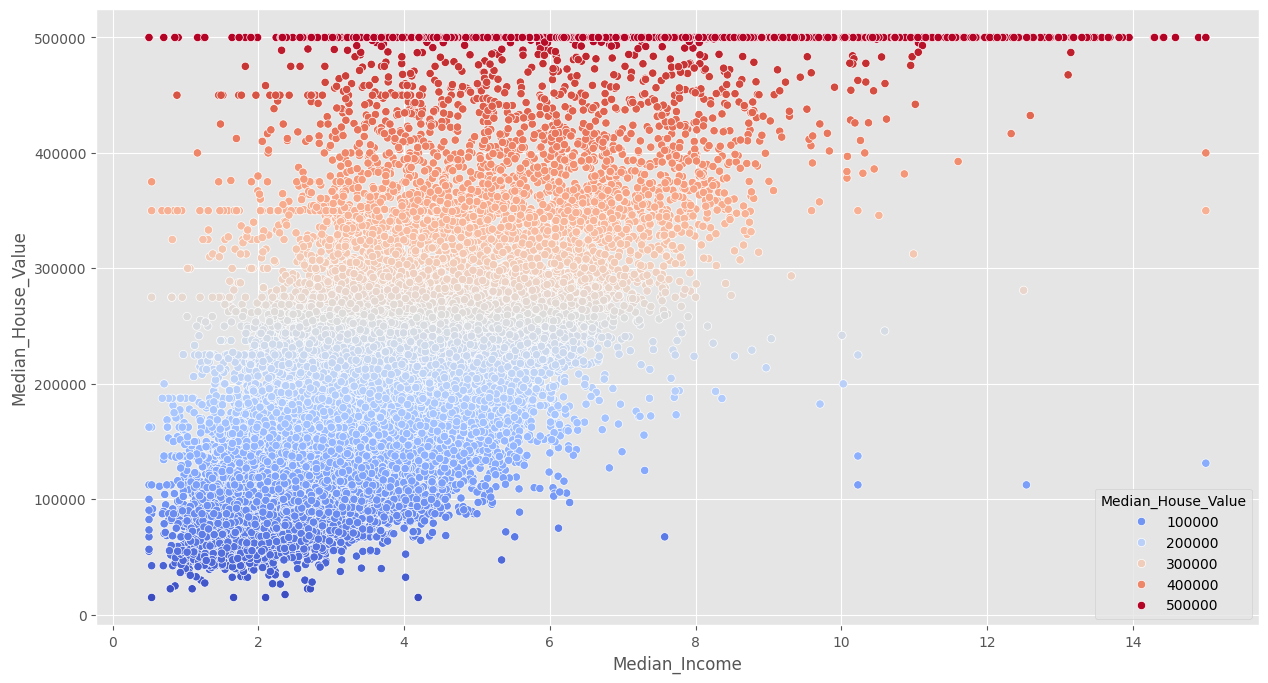

In [27]:
plt.figure(figsize= (15,8))
sns.scatterplot(x="Median_Income", y = "Median_House_Value", data=data ,hue ="Median_House_Value" ,palette="coolwarm")

<Axes: xlabel='Distance_to_coast', ylabel='Median_House_Value'>

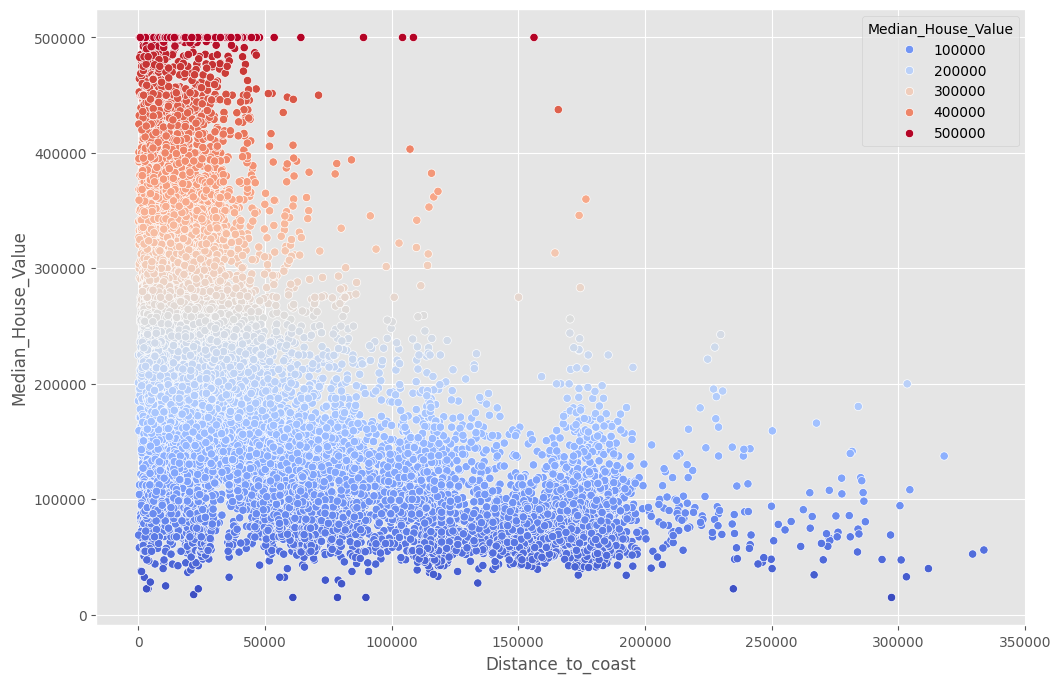

In [28]:
sns.scatterplot(x="Distance_to_coast", y = "Median_House_Value", data=data ,hue ="Median_House_Value" ,palette="coolwarm")

<Axes: xlabel='Latitude', ylabel='Longitude'>

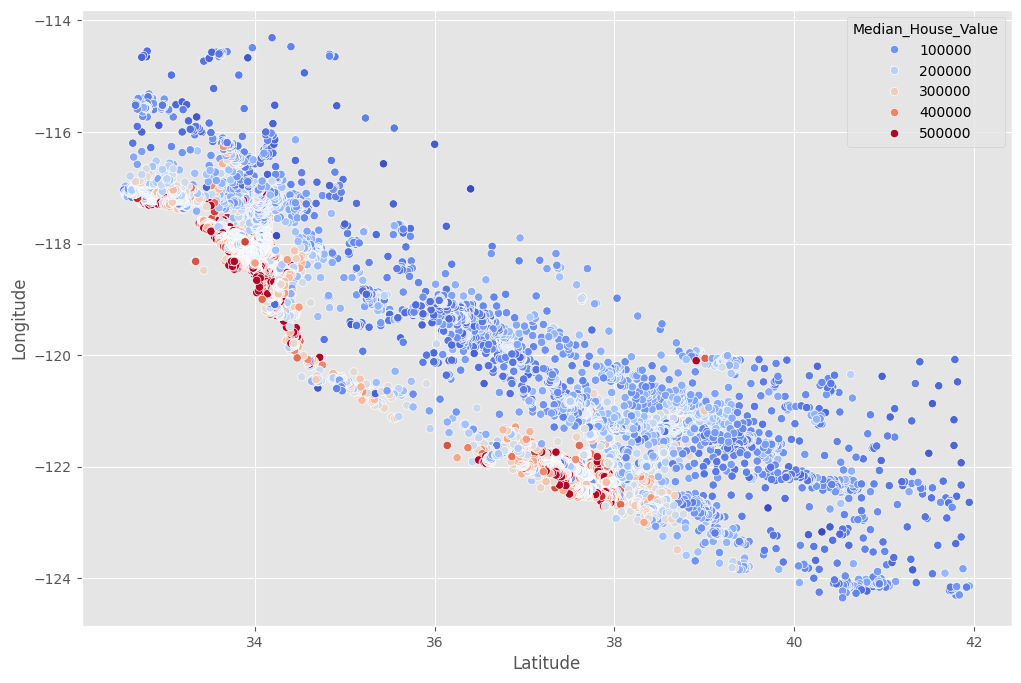

In [29]:
#latitude and langitude show a map similar to california 
#the houses closer to the ocean are red which means more expensive , which makes sense
sns.scatterplot(x="Latitude", y = "Longitude", data=data ,hue ="Median_House_Value" ,palette="coolwarm")

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Median_House_Value        20640 non-null  float64
 1   Median_Income             20640 non-null  float64
 2   Median_Age                20640 non-null  int64  
 3   Tot_Rooms                 20640 non-null  float64
 4   Tot_Bedrooms              20640 non-null  float64
 5   Population                20640 non-null  float64
 6   Households                20640 non-null  float64
 7   Latitude                  20640 non-null  float64
 8   Longitude                 20640 non-null  float64
 9   Distance_to_coast         20640 non-null  float64
 10  Distance_to_LA            20640 non-null  float64
 11  Distance_to_SanDiego      20640 non-null  float64
 12  Distance_to_SanJose       20640 non-null  float64
 13  Distance_to_SanFrancisco  20640 non-null  float64
 14  Rooms_

In [31]:
from sklearn.model_selection import train_test_split
#divide data to features and label
features = data.drop("Median_House_Value",axis=1)
labels = data["Median_House_Value"]
x_train,x_test, y_train , y_test = train_test_split(features, labels, test_size=0.3, random_state=42)

In [32]:
x_train

Median_Income  Median_Age  Tot_Rooms  Tot_Bedrooms  Population  \
7061          4.1312          35   7.783224      5.986452    7.104965   
14689         2.8631          20   7.688455      6.280396    6.906755   
17323         4.2026          24   7.378384      5.641907    6.594413   
10056         3.1094          14   6.697034      5.017280    5.710427   
15750         3.3068          52   8.067149      6.562444    7.330405   
...              ...         ...        ...           ...         ...   
11284         6.3700          35   7.192934      5.303305    6.489205   
11964         3.0500          33   8.033983      6.345636    7.469084   
5390          2.9344          36   7.650169      6.343880    7.470794   
860           5.7192          15   8.181720      6.391917    7.482682   
15795         2.5755          52   8.349011      7.181592    7.870548   

       Households  Latitude  Longitude  Distance_to_coast  Distance_to_LA  \
7061     6.011267     33.93    -118.02       23776.279176    24698.576810   
14689    6.206576     32.79    -117.09       14344.926278   176528.652553   
17323    5.652489     34.59    -120.14       12910.735294   184124.277358   
10056    4.927254     39.26    -121.00      141445.546005   629022.940358   
15750    6.498282     37.77    -122.45        3136.884725   560579.904946   
...           ...       ...        ...                ...             ...   
11284    5.379897     33.78    -117.96       12864.492584    40019.707560   
11964    6.107023     34.02    -117.43       62967.287930    75062.702751   
5390     6.267201     34.03    -118.38       11715.072797    12801.292905   
860      6.326149     37.58    -121.96       13858.996090   515808.055643   
15795    7.124478     37.77    -122.42        3769.754012   558759.883301   

       Distance_to_SanDiego  Distance_to_SanJose  Distance_to_SanFrancisco  \
7061          156839.237082        515562.123164             583596.992915   
14689          10601.133551        668041.340253             736046.139555   
17323         345599.205561        343624.484526             409395.907938   
10056         805282.088005        227741.496605             206899.738761   
15750         739000.855009         68885.469946               1702.189357   
...                     ...                  ...                       ...   
11284         139727.044811        531756.235514             599783.704103   
11964         147161.673571        546147.803990             613968.851604   
5390          184842.756194        485477.345833             553467.812127   
860           694699.028968         27824.577268              46750.315127   
15795         737236.735015         67026.157049               1086.741962   

       Rooms_per_household  
7061              5.882353  
14689             4.401210  
17323             5.617544  
10056             5.869565  
15750             4.801205  
...                    ...  
11284             6.129032  
11964             6.868597  
5390              3.986717  
860               6.395349  
15795             3.402576  

[14448 rows x 14 columns]

In [33]:
#validation test split
x_test, x_val ,y_test, y_val = train_test_split(x_test, y_test , test_size=0.5, random_state=42)

In [34]:
x_test

Median_Income  Median_Age  Tot_Rooms  Tot_Bedrooms  Population  \
14100         1.5517          31   7.118826      5.958425    6.704414   
1661          7.5695          16   8.137688      6.056784    7.201171   
4015          8.4196          21   8.257386      6.304449    7.259820   
10607         6.0634          15   7.514255      5.799093    6.734592   
4999          2.5848          52   7.156956      5.834811    7.217443   
...              ...         ...        ...           ...         ...   
17554         1.4730          35   8.101678      7.050989    8.045588   
1498          7.5898          25   7.883069      5.814131    6.967909   
16657         3.7337          17   7.908019      6.378426    7.234177   
12725         2.7788          27   8.268732      6.654153    7.345365   
18498         4.0238          19   7.771489      5.976351    7.040536   

       Households  Latitude  Longitude  Distance_to_coast  Distance_to_LA  \
14100    5.983936     32.76    -117.09       11881.988776   179203.244357   
1661     6.059123     37.93    -121.94       16937.646222   544418.994406   
4015     6.282267     34.15    -118.58       12903.211137    32819.072838   
10607    5.733341     33.68    -117.78       15756.664180    59548.420250   
4999     5.796058     33.99    -118.28       17975.036426     7687.137275   
...           ...       ...        ...                ...             ...   
17554    6.980076     37.33    -121.88       23557.904307   490504.445914   
1498     5.811141     37.93    -122.01       14902.589658   548283.878642   
16657    6.345636     35.27    -120.66       13201.811030   259170.812402   
12725    6.634633     38.61    -121.35       63245.331553   578067.911604   
18498    5.899897     37.02    -121.51       32419.085630   442937.745763   

       Distance_to_SanDiego  Distance_to_SanJose  Distance_to_SanFrancisco  \
14100           8272.448913        670618.729843             738617.071827   
1661          723729.860147         66236.883469              46493.816264   
4015          206807.083464        463465.816961             531424.510880   
10607         121706.747803        551076.647856             619110.587690   
4999          175715.708783        494810.009814             562818.021407   
...                     ...                  ...                       ...   
17554         669043.082220          1303.105538              69275.146629   
1498          727544.068096         66905.262100              40856.237232   
16657         429733.516305        254860.818040             320257.171471   
12725         756593.366800        149499.255089             132556.433224   
18498         621516.681747         48807.309559             116842.374872   

       Rooms_per_household  
14100             3.110831  
1661              7.992991  
4015              7.207477  
10607             5.935275  
4999              3.899696  
...                    ...  
17554             3.069767  
1498              7.940120  
16657             4.770175  
12725             5.124836  
18498             6.498630  

[3096 rows x 14 columns]

In [35]:
x_val

Median_Income  Median_Age  Tot_Rooms  Tot_Bedrooms  Population  \
2457          3.1333          30   7.421178      5.765191    6.873164   
12273         2.3355          18   8.471149      6.786717    7.532624   
4081          3.3669          29   7.874739      6.424869    6.976348   
15537         3.8750          46   3.951244      2.564949    4.077537   
2915          4.3482           9   7.113142      5.455321    6.013715   
...              ...         ...        ...           ...         ...   
9742          5.2203          18   7.362011      5.438079    6.621406   
15840         3.9500          52   7.992945      6.434547    7.082549   
12181         2.0878          16   7.964156      6.356108    7.527794   
5139          2.0754          39   7.851272      6.533789    7.863651   
17095         3.9290          36   7.611348      6.070738    7.018402   

       Households  Latitude  Longitude  Distance_to_coast  Distance_to_LA  \
2457     5.641907     36.51    -119.65      164920.577817   301623.727319   
12273    6.728629     33.97    -117.01       86130.612595   114078.259825   
4081     6.350886     34.15    -118.37       19359.818278    15920.092826   
15537    2.564949     33.12    -117.11       19578.765209   147556.036878   
2915     5.356586     35.36    -119.06      115980.874529   163443.236899   
...           ...       ...        ...                ...             ...   
9742     5.389072     36.81    -121.60       17347.788439   431801.325402   
15840    6.378426     37.75    -122.43        3630.934883   557757.690310   
12181    6.300786     33.77    -117.27       54462.813123    95175.007721   
5139     6.445720     33.97    -118.27       16823.433117     9460.385694   
17095    6.068426     37.47    -122.24        7416.046998   523771.654354   

       Distance_to_SanDiego  Distance_to_SanJose  Distance_to_SanFrancisco  \
2457          479409.189996        219497.073087             283758.669403   
12273         140172.113760        578373.367308             645943.514018   
4081          194981.846980        475902.949059             543927.054192   
15537          45204.326143        638916.139107             706950.975906   
2915          342132.467155        335570.984556             403305.716341   
...                     ...                  ...                       ...   
9742          609496.877460         63953.023624             129988.170864   
15840         736171.972608         66074.455633               2668.002050   
12181         117665.534532        576126.650501             644025.202647   
5139          173381.193166        497104.029302             565109.304764   
17095         701888.620863         34103.884288              37766.431984   

       Rooms_per_household  
2457              5.925532  
12273             5.711722  
4081              4.589878  
15537             4.000000  
2915              5.792453  
...                    ...  
9742              7.191781  
15840             5.025467  
12181             5.277064  
5139              4.077778  
17095             4.678241  

[3096 rows x 14 columns]

In [36]:
#normalization of data
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)
x_val = scaler.fit_transform(x_val)

In [37]:
x_train

array([[ 0.13350629,  0.50935748,  0.19975924, ...,  0.77570693,
         0.7964243 ,  0.18106017],
       [-0.53221805, -0.67987313,  0.0739235 , ...,  1.47976471,
         1.40718649, -0.42262953],
       [ 0.1709897 , -0.36274497, -0.33779587, ..., -0.01819818,
         0.09851658,  0.07312833],
       ...,
       [-0.49478713,  0.58863952,  0.02308571, ...,  0.63679344,
         0.67571674, -0.59156984],
       [ 0.96717102, -1.07628333,  0.72889084, ..., -1.47637316,
        -1.35436278,  0.39014889],
       [-0.68320166,  1.85715216,  0.95102285, ..., -1.29536373,
        -1.5373063 , -0.82965604]])

#### Training Linear Model

In [38]:
#trainig linear model
l_reg = LinearRegression()
l_reg.fit(x_train, y_train)

LinearRegression()

In [39]:
l_reg.score(x_test,y_test)

0.6555387370974474

In [40]:
y_pred = l_reg.predict(x_test)

In [41]:

print("Mean squared error: %f" % mean_squared_error(y_test, y_pred))
print("Mean absolute error: %f" % mean_absolute_error(y_test, y_pred))

Mean squared error: 4487530316.917306
Mean absolute error: 48653.315997


#### Training Ridge model

In [42]:
from sklearn.linear_model import Ridge

mse_scores=[]
#try 100 different alpha "penalty" between 1e-10 1e10 to find optimal
alphas = np.logspace(-10,10,100)
for alpha in alphas:
    # Create Ridge Regression model with current alpha
    ridge_reg = Ridge(alpha=alpha)
    ridge_reg.fit(x_train,y_train)
    y_hat = ridge_reg.predict(x_val)
    score=mean_squared_error(y_val, y_hat)

    mse_scores.append(score)


In [43]:
alphas

array([1.00000000e-10, 1.59228279e-10, 2.53536449e-10, 4.03701726e-10,
       6.42807312e-10, 1.02353102e-09, 1.62975083e-09, 2.59502421e-09,
       4.13201240e-09, 6.57933225e-09, 1.04761575e-08, 1.66810054e-08,
       2.65608778e-08, 4.22924287e-08, 6.73415066e-08, 1.07226722e-07,
       1.70735265e-07, 2.71858824e-07, 4.32876128e-07, 6.89261210e-07,
       1.09749877e-06, 1.74752840e-06, 2.78255940e-06, 4.43062146e-06,
       7.05480231e-06, 1.12332403e-05, 1.78864953e-05, 2.84803587e-05,
       4.53487851e-05, 7.22080902e-05, 1.14975700e-04, 1.83073828e-04,
       2.91505306e-04, 4.64158883e-04, 7.39072203e-04, 1.17681195e-03,
       1.87381742e-03, 2.98364724e-03, 4.75081016e-03, 7.56463328e-03,
       1.20450354e-02, 1.91791026e-02, 3.05385551e-02, 4.86260158e-02,
       7.74263683e-02, 1.23284674e-01, 1.96304065e-01, 3.12571585e-01,
       4.97702356e-01, 7.92482898e-01, 1.26185688e+00, 2.00923300e+00,
       3.19926714e+00, 5.09413801e+00, 8.11130831e+00, 1.29154967e+01,
      

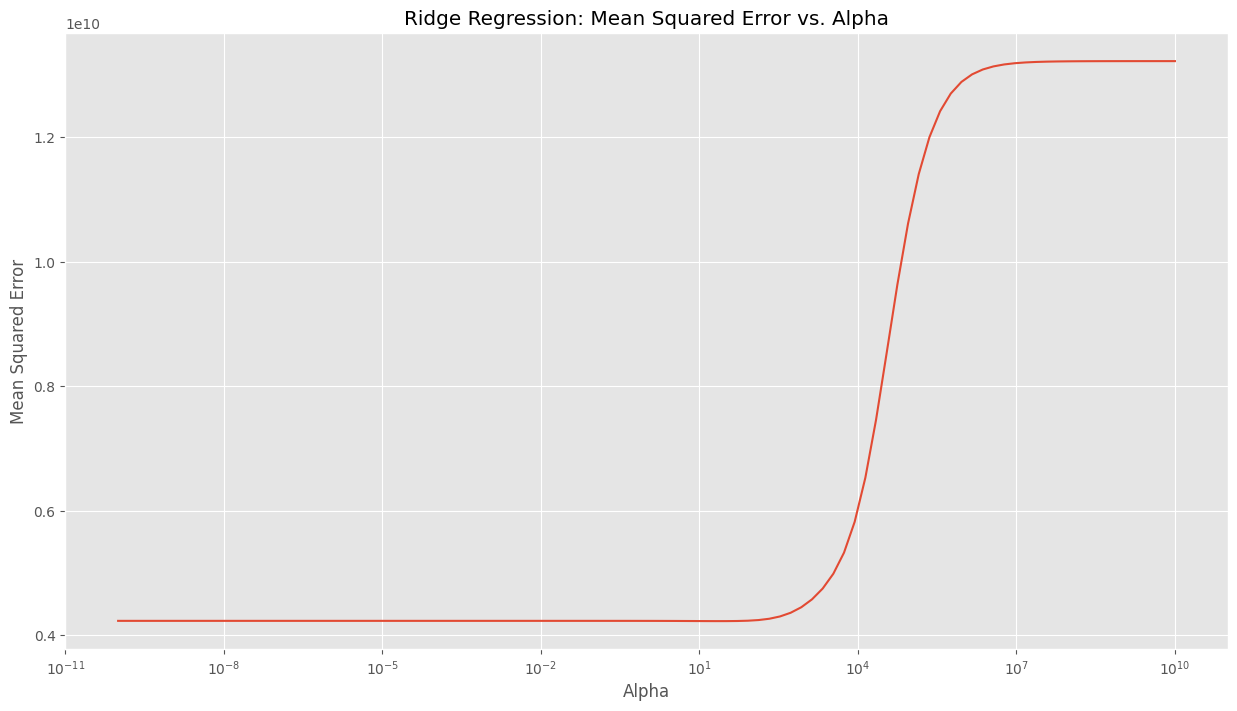

In [44]:
#plot mse across different alphas
plt.figure(figsize=(15,8 ))
plt.plot(alphas, mse_scores)
plt.xlabel('Alpha')
plt.ylabel('Mean Squared Error')
plt.title('Ridge Regression: Mean Squared Error vs. Alpha')
plt.xscale('log')  # Use logarithmic scale for alpha values
plt.grid(True)
plt.show()

In [45]:
#fitting ridge model
best_alpha = alphas[np.argmin(mse_scores)]
ridge_model = Ridge(alpha=best_alpha)
ridge_model.fit(x_train,y_train)

Ridge(alpha=20.565123083486515)

In [46]:
#accuracy of ridge model
ridge_model.score(x_train,y_train)

0.6741236421660808

In [47]:
#Reporting mse and mae
y_pred_ridge= ridge_model.predict(x_test)
print("Mean squared error: %f" % mean_squared_error(y_test, y_pred_ridge))
print("Mean absolute error: %f" % mean_absolute_error(y_test, y_pred_ridge))

Mean squared error: 4496549495.083117
Mean absolute error: 48800.450253


#### Training Lasso Model

In [48]:
from sklearn.linear_model import Lasso
mse_scores=[]
alphas = np.logspace(-10,10,100)
for alpha in alphas:
    # Create Ridge Regression model with current alpha
    lasso_reg = Lasso(alpha = alpha)
    lasso_reg.fit(x_train,y_train)
    y_hat = lasso_reg.predict(x_val)
    #scores = -cross_val_score(ridge_reg, x_val, y_val, cv=10, scoring='neg_mean_squared_error')
    score=mean_squared_error(y_val, y_hat)
    #mean_mse = np.mean(scores)

    mse_scores.append(score)

/home/hy/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.150e+13, tolerance: 1.936e+10
  model = cd_fast.enet_coordinate_descent(
/home/hy/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.150e+13, tolerance: 1.936e+10
  model = cd_fast.enet_coordinate_descent(
/home/hy/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.150e+13, toler

In [49]:
best_alpha = alphas[np.argmin(mse_scores)]
lasso_model = Lasso(alpha=best_alpha)
lasso_model.fit(x_train,y_train)

/home/hy/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.423e+10, tolerance: 1.936e+10
  model = cd_fast.enet_coordinate_descent(


Lasso(alpha=83.02175681319736)

In [50]:
lasso_model.score(x_train,y_train)

0.6737104128132916

Lasso model gets nearly the same accuracy as the ridge model but it drops some features / used less features

In [51]:
y_pred_lasso= lasso_model.predict(x_test)
print("Mean squared error: %f" % mean_squared_error(y_test, y_pred_lasso))
print("Mean absolute error: %f" % mean_absolute_error(y_test, y_pred_lasso))

Mean squared error: 4502485410.023288
Mean absolute error: 48852.813831
